#### Name: Andrew Shapiro
#### Date: 12/09/2024
#### Exercise: Milestone #4
#### Description: This notebook will go ahead and use our board game data in order to analyze which board game mechanics and domains are becoming increasily popular. This would help them be able to figure out which types of mechanics or types of games they should be inspired from in order to have the best chance at creating a popular game.

In [40]:
import pandas as pd

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [42]:
import numpy as np

In [43]:
import seaborn as sns

## Import the cleaned data from the Web Scraping Notebook.
There is one cleaned csv files that have the data we web scraped from the `Milestone3.ipynb` notebook. 
* `CleanedBGG.csv` has the data from BGG's Board Game Website.

In [44]:
# Read the datasets into a pandas data frame.
df = pd.read_csv('CleanedBGG.csv')

### **(1)** For board games that have an average rating of 8+, what is the most frequent type of game?
* For this question, I will need to find which "Domains" in the `domain` column is most frequent after filtering the dataset to be only board games with a ratings of 8/10, 7/10, and 6/10 respectfully. 

For this, I will need to go ahead and filter our dataset to only have the games that meet the rating threshold, starting at 8/10 and moving my way down to the 7/10 and 6/10, seeing if the rating would create a substantial difference in our results.

In [45]:
# Filtering to have a dataframe that will only have games with ratings of 8/10 or higher.
rating_df = df[df['rating_average'] >= 8]

In [46]:
# Checking how many games are left in our dataframe after filtering.
rating_df.shape

(760, 202)

First, I will need to drop the 'Unknown' tag as well from the data.

In [47]:
# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['domain_Unknown'])

We have now narrowed down the scope of the dataframe to be only 760 board game entries instead of 20,000. Now, we will only get results based on this dataset, which will show results based on the most popular games.

Now, I will go ahead and make another dataframe that will count how much of each type of domain is in the new filtered dataframe. I will do this by getting all columns that have the `domain_` flag in front of them and then go ahead and count the total amount of cells with a true element. The flag allows us to be able to get all of the columns quickly for both the mechanics and domains.

In [48]:
# Filter to be the columns that had the domain tag, as those contain the data related to board game domains (genres).
columns = rating_df.filter(like='domain').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

columns

Index(['domain_Strategy Games', 'domain_Wargames', 'domain_Party Games',
       'domain_Thematic Games', 'domain_Children's Games',
       'domain_Customizable Games', 'domain_Family Games',
       'domain_Abstract Games'],
      dtype='object')

In [49]:
# Finding out the new size of the data frame.
rating_df.shape

(760, 8)

We created a new dataframe with board game domains (genres). This has now shortened our data table to be from 20,000+ total entries to be 760 entries. These 760 entries are all board games with a rating of 8/10 or higher. We have also removed all columns but the `domain_` columns.

Now, we need to go through each of the 9 domains and count how many of the board games are in that category. I did this by going through the 8 columns that we stored in a list called `columns` and counting how many '1's are present in each column. Then, I appended this value to a new list `count` which will store the count for each board game domain.

In [50]:
# This empty list 'count' will store the count of each board game domain for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

count

[np.int64(124),
 np.int64(259),
 np.int64(0),
 np.int64(82),
 np.int64(1),
 np.int64(9),
 np.int64(9),
 np.int64(7)]

We now have a list of numbers that show how board games with a rating of 8/10 or higher are in each board game domain. 

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'domain_' tag that were in front of the columns that we needed to reference.

In [51]:
# Replace 'domain_' with '' to delete them from each column name.
columns = columns.str.replace('domain_', '', regex=False)
columns

Index(['Strategy Games', 'Wargames', 'Party Games', 'Thematic Games',
       'Children's Games', 'Customizable Games', 'Family Games',
       'Abstract Games'],
      dtype='object')

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [52]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the value that is 10% of the data table, then, go through the entire list and check if the value is equal or greater to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [53]:
# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green',
 'green',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each board game domain on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `domain_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts that only contain board games with a rating of 8/10 or higher and sorted using the algorithm earlier.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Board Game Domain (Genre)')

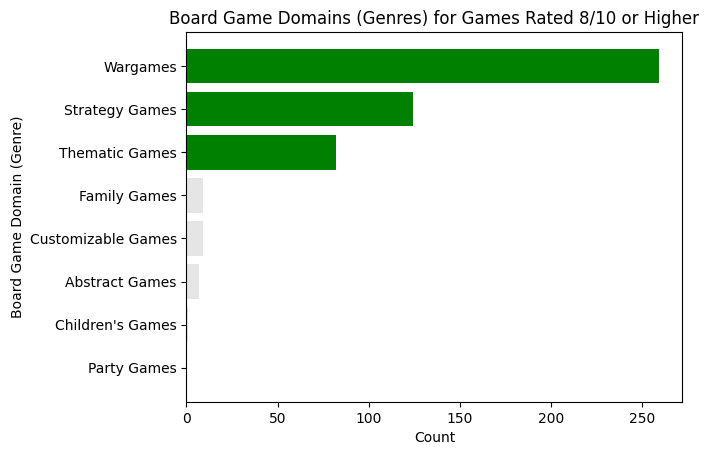

In [54]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Domains (Genres) for Games Rated 8/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Board Game Domain (Genre)")

In this chart, we can see that Wargames takes the lead by a lot. Additionally, we can see that Strategy Games and Thematic Games aren't that far behind, making up at at 10% of the games reated 8/10 or higher. This would be useful for board game deveopers to try to make their latest game follow those genres rather than having them follow any of the other 5 categories, as those have barely any numbers on the charts. Games like Children's Games and Party Games have none at all, making them something that board game developers should try to stir away from if they want to have a chance at making their game a success.

However, I was not sure about how confident these results are, so I decided to run the program again but instead do games with a rating of 7/10 (which broads our scope a bit), and a third time of only board games rated 6/10 or higher to see if there is a trend between the most popular board game domains.

Text(0, 0.5, 'Board Game Domain (Genre)')

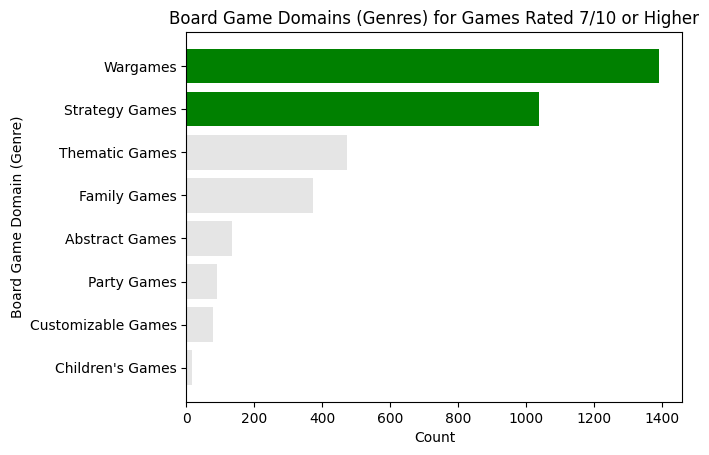

In [55]:
# Filtering to have a dataframe that will only have games with ratings of 7/10 or higher.
rating_df = df[df['rating_average'] >= 7]

# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['domain_Unknown'])

# Filter to be the columns that had the domain tag, as those contain the data related to board game domains (genres).
columns = rating_df.filter(like='domain').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

# This empty list 'count' will store the count of each board game domain for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

# Replace 'domain_' with '' to delete them from each column name.
columns = columns.str.replace('domain_', '', regex=False)

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Domains (Genres) for Games Rated 7/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Board Game Domain (Genre)")

Like the first chart, we can see that Wargames are still in the first place slot by a large lead. Similarly, we see that Strategy and Thematic Games compose of the second and third place, however, we can see that Thematic Games are no longer composing of 10% of board games like they did with a small scope of 8/10 or higher rated games. With this, we see that Family Games follows up not far behind from Thematic Games.

From this chart, we can still see that board game developers should try to focus their games more on wargames and strategy game domains. 

I will run this test one more time with a larger scope of 6/10 or higher rated games.

Text(0, 0.5, 'Board Game Domain (Genre)')

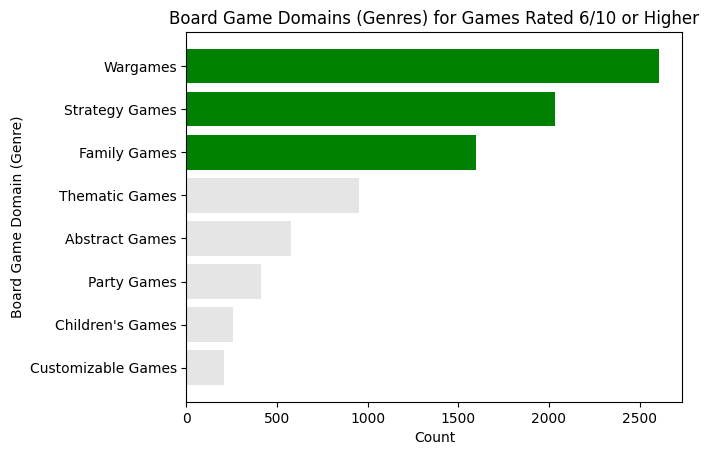

In [56]:
# Filtering to have a dataframe that will only have games with ratings of 6/10 or higher.
rating_df = df[df['rating_average'] >= 6]

# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['domain_Unknown'])

# Filter to be the columns that had the domain tag, as those contain the data related to board game domains (genres).
columns = rating_df.filter(like='domain').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

# This empty list 'count' will store the count of each board game domain for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

# Replace 'domain_' with '' to delete them from each column name.
columns = columns.str.replace('domain_', '', regex=False)

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Domains (Genres) for Games Rated 6/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Board Game Domain (Genre)")

Shockingly, we see that Thematic Games is no longer in the third place with a larger scope. We see that family games now takes that third place slot and composes of over 10% of the board games in the scope. Yes, we can still see that wargames and strategy games are still first place and second place respectively.

What I learned from this analysis is that wargames and strategy games are the two most popular categories so board game developers should try to make the focus of their next game be apart of either of those 2 genres, or even taking a bit of both genre. In a larger scope, family games is also a top contender for a genre that board game developers could try to incorporate into their next game, but in a smaller scope, thematic games are something that they could focus on. 

### **(2)** For board games that have an average rating of 8+, what is the most frequent mechanic seen?
* For this question, I will need to find which "Mechanics" in the `mechanic` column is most frequent after filtering the dataset to be only board games with a ratings of 8/10, 7/10, and 6/10 respectfully. 

For this, I will need to go ahead and filter our dataset to only have the games that meet the rating threshold, starting at 8/10 and moving my way down to the 7/10 and 6/10, seeing if the rating would create a substantial difference in our results.

In [57]:
# Filtering to have a dataframe that will only have games with ratings of 8/10 or higher.
rating_df = df[df['rating_average'] >= 8]

In [58]:
# Checking how many games are left in our dataframe after filtering.
rating_df.shape

(760, 202)

First, I will need to drop the 'Unknown' tag as well from the data.

In [59]:
# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['mechanic_Unknown'])

We have now narrowed down the scope of the dataframe to be only 760 board game entries instead of 20,000. Now, we will only get results based on this dataset, which will show results based on the most popular games.

Now, I will go ahead and make another dataframe that will count how much of each type of mechanic is in the new filtered dataframe. I will do this by getting all columns that have the `mechanic_` flag in front of them and then go ahead and count the total amount of cells with a true element. The flag allows us to be able to get all of the columns quickly for both the mechanics and domains.

In [60]:
# Filter to be the columns that had the mechanic tag, as those contain the data related to board game mechanics.
columns = rating_df.filter(like='mechanic').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

columns

Index(['mechanic_Deck Bag and Pool Building', 'mechanic_Action Retrieval',
       'mechanic_Action Timer', 'mechanic_Follow', 'mechanic_Negotiation',
       'mechanic_Area Movement', 'mechanic_Delayed Purchase',
       'mechanic_Narrative Choice / Paragraph', 'mechanic_Flicking',
       'mechanic_Voting',
       ...
       'mechanic_Worker Placement', 'mechanic_Closed Economy Auction',
       'mechanic_Player Judge', 'mechanic_Line Drawing', 'mechanic_Acting',
       'mechanic_Finale Ending', 'mechanic_King of the Hill',
       'mechanic_Card Play Conflict Resolution',
       'mechanic_Turn Order: Stat-Based', 'mechanic_Auction: Fixed Placement'],
      dtype='object', length=182)

In [61]:
# Finding out the new size of the data frame.
rating_df.shape

(760, 182)

We created a new dataframe with board game mechanics. This has now shortened our data table to be from 20,000+ total entries to be 760 entries. These 760 entries are all board games with a rating of 8/10 or higher. We have also removed all columns but the `mechanic_` columns.

Now, we need to go through each of the 182 mechanics and count how many of the board games are in that category. I did this by going through the 8 columns that we stored in a list called `columns` and counting how many '1's are present in each column. Then, I appended this value to a new list `count` which will store the count for each board game mechanic.

In [62]:
# This empty list 'count' will store the count of each board game mechanic for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

count

[np.int64(73),
 np.int64(5),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(66),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(10),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(4),
 np.int64(20),
 np.int64(4),
 np.int64(6),
 np.int64(0),
 np.int64(12),
 np.int64(9),
 np.int64(0),
 np.int64(71),
 np.int64(49),
 np.int64(5),
 np.int64(11),
 np.int64(11),
 np.int64(92),
 np.int64(0),
 np.int64(5),
 np.int64(2),
 np.int64(1),
 np.int64(27),
 np.int64(15),
 np.int64(1),
 np.int64(7),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(139),
 np.int64(13),
 np.int64(4),
 np.int64(1),
 np.int64(0),
 np.int64(13),
 np.int64(3),
 np.int64(5),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(2),
 np.int64(29),
 np.int64(0),
 np.int64(64),
 np.int64(5),
 np.int64(46),
 np.int64(12),
 np.int64(6),
 np.int64(28),
 np.int64(9),
 np.int64(4),
 np.int64(1),
 np.int64(43),
 np.int64(1),
 np.int64(2),
 np.int64(49),
 np.int64(0),
 np.int64(249),
 np.int64(0),
 np.int64

We now have a list of numbers that show how board games with a rating of 8/10 or higher are in each board game mechanic. 

To keep the column names cleaner and easier to read when graphing, I have went ahead and used the string .replace() function to delete the 'mechanic_' tag that were in front of the columns that we needed to reference.

In [63]:
# Replace 'mechanic_' with '' to delete them from each column name.
columns = columns.str.replace('mechanic_', '', regex=False)
columns

Index(['Deck Bag and Pool Building', 'Action Retrieval', 'Action Timer',
       'Follow', 'Negotiation', 'Area Movement', 'Delayed Purchase',
       'Narrative Choice / Paragraph', 'Flicking', 'Voting',
       ...
       'Worker Placement', 'Closed Economy Auction', 'Player Judge',
       'Line Drawing', 'Acting', 'Finale Ending', 'King of the Hill',
       'Card Play Conflict Resolution', 'Turn Order: Stat-Based',
       'Auction: Fixed Placement'],
      dtype='object', length=182)

When I first ran the code above and graphed it with the graphing code at the bottom, I wasn't appealed to it. I didn't like how it wasn't sorted and how everything was blue. I wanted to make it easier to see so I added a sort and color system to the graph. I also get rid of every row that has a count of 0.

I used **ChatGPT** to help me out with the sorting code snippet below.

In [64]:
# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# Filter through and get rid of all counts that are 0.
sorted_columns = [col for col, count in zip(sorted_columns, sorted_count) if count >= 50]
sorted_count = [count for count in sorted_count if count >= 50]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

I was not able to find how you created the color thing in any of your slideshow materials so I used list comprehensions to make my own version. I did this by finding the value that is 10% of the data table, then, go through the entire list and check if the value is equal or greater to the top value I found earlier. If it is, it would make that color green in the color list and if it is not, it would make it gray.

This would become the `colors` list that we will use for creating our graph to make it colorful and easier for us to see.

In [65]:
# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

colors

['#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 '#E5E5E5',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green']

To display the data, I used a horizontal bar chart. This is the best choice as it will display each board game domain on the y axis and show the count on the x axis. I thought about doing a vertical bar graph, but I feel like it would look weird and the text labels may crowd in the bottom. This is why I did a horizontal bar chart.

I used the `sorted_columns` for the column data. This is the list of columns with the `mechanic_` flag removed and sorted using the algorithm earlier.
I used the `sorted_Count` for the count data. This is the list of counts that only contain board games with a rating of 8/10 or higher and sorted using the algorithm earlier.

I added color from the `colors` array as well. This show display the top option in green and the others in gray.

I also added a title, x axis label, and y axis label to inform us on what the graph is about and which piece of data is each axis referencing.

Text(0, 0.5, 'Mechanic')

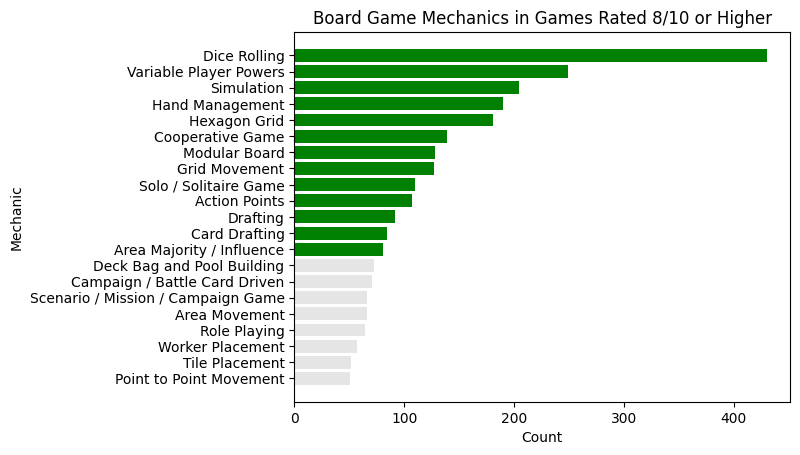

In [66]:
# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Mechanics in Games Rated 8/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Mechanic")

In this chart, we can see that mechanics like Dice Rolling, Variable Player Powers, Simulation, Hand Management, and the Hexagon Grid are at the top of the most used game mechanics for board games. Everything that is in green shows that at least 10% of board games have this mechanic out of the pool of board games. Additionally, this chart only focuses on the mechanics that have at least 50 entries.

However, I was not sure about how confident these results are, so I decided to run the program again but instead do games with a rating of 7/10 (which broads our scope a bit), and a third time of only board games rated 6/10 or higher to see if there is a trend between the most popular board game mechanics.

Text(0, 0.5, 'Mechanic')

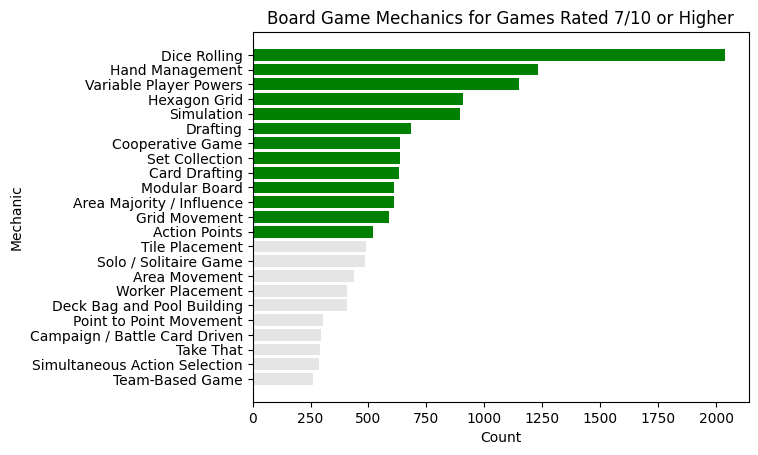

In [74]:
# Filtering to have a dataframe that will only have games with ratings of 7/10 or higher.
rating_df = df[df['rating_average'] >= 7]

# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['mechanic_Unknown'])

# Filter to be the columns that had the domain tag, as those contain the data related to board game domains (genres).
columns = rating_df.filter(like='mechanic').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

# This empty list 'count' will store the count of each board game domain for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

# Replace 'domain_' with '' to delete them from each column name.
columns = columns.str.replace('mechanic_', '', regex=False)

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# Filter through and get rid of all counts that are 0.
sorted_columns = [col for col, count in zip(sorted_columns, sorted_count) if count >= 250]
sorted_count = [count for count in sorted_count if count >= 250]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Mechanics for Games Rated 7/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Mechanic")

Like the first chart, the top 5 mechanics are still used. There's not much change but the introduction of new mechanics being part of the 10%, which is most likely what happens due to the increased scope of the dataframe.

From this chart, we can still see that board game developers should try to implement these mechanics. 

I will run this test one more time with a larger scope of 6/10 or higher rated games.

Text(0, 0.5, 'Mechanic')

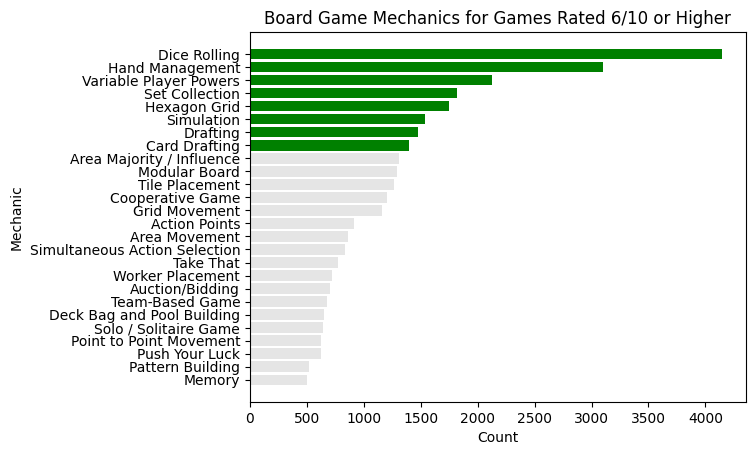

In [76]:
# Filtering to have a dataframe that will only have games with ratings of 7/10 or higher.
rating_df = df[df['rating_average'] >= 6]

# Drop the 'Unknown' category.
rating_df = rating_df.drop(columns=['mechanic_Unknown'])

# Filter to be the columns that had the domain tag, as those contain the data related to board game domains (genres).
columns = rating_df.filter(like='mechanic').columns

# Get rid of columns that are not needed.
rating_df = rating_df[list(columns)]

# This empty list 'count' will store the count of each board game domain for board games that have a rating of 8/10 or higher.
count = []

# Going through each column and counting how many '1s' and appending it to count.
for c in columns:
    count.append(rating_df[c].sum())

# Replace 'domain_' with '' to delete them from each column name.
columns = columns.str.replace('mechanic_', '', regex=False)

# Sort indexes by their argument.
sorted_indices = np.argsort(count)
# Sort the count data by the new sorted index array.
sorted_count = np.array(count)[sorted_indices]
# Sort the column name data by the new sorted index array.
sorted_columns = np.array(columns)[sorted_indices]

# Filter through and get rid of all counts that are 0.
sorted_columns = [col for col, count in zip(sorted_columns, sorted_count) if count >= 500]
sorted_count = [count for count in sorted_count if count >= 500]

# OpenAI. ChatGPT. 2024. OpenAI, https://www.openai.com/chatgpt.

# Find the highest count value.
top = 0.1 * rating_df.shape[0]
# Form a color list with list comprehension and set each color depending on if it is equal to the highest count value.
colors = ['green' if i > top else '#E5E5E5' for i in sorted_count]

# Create the horizontal bar chart with the data and add the colors attribute.
plt.barh(sorted_columns,sorted_count, color=colors)

# Add a title, x-axis label, and y-axis label to inform us of what the graph is about and what pieces of data are being referenced.
plt.title("Board Game Mechanics for Games Rated 6/10 or Higher")
plt.xlabel("Count")
plt.ylabel("Mechanic")

This graph showcases similar results as the other two graphs, with the exception that Simulation is no longer in the top 5 and is now in placed six. The new addition to the top 5 is Set Collection, which surprisingly jumped to #4. Nevertheless, board game developers should implement dice rolling, hand management, variable player powers, set collection, a hexagon grid, and simulation. Additionally, they can use some of the information from the rest of the dataset, such as domains and genres, to further narrow down a general scope for them to start building their board game.